In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carrega o conjunto de dados
file = 'monthly-sunspots.csv'
df = pd.read_csv(file)
all_dados = pd.to_numeric(df['Monthly Mean Total Sunspot Number']).to_numpy()
df['Date'] = pd.to_datetime(df['Date'])
all_meses = df['Date']
#df

In [16]:
#Separando os conjuntos

# Conjuntos de teste 2010 à 2019 (120 meses)
sunspots_teste = all_dados[-120:]
anos_teste = all_meses[-120:]

# Conjuntos de treino 1749 à 2010 (3132 meses)
sunspots_treino = all_dados[:-120]
anos_treino = all_meses[:-120]

In [20]:
# Gerando matriz phi (Tópico 3 #5) e y
def gera_phi(dados, K):
    phi = []
    for i in range(len(dados) - K):
        # Flip para pegar os valores de sunspots mais recentes
        phi_x = np.flip(dados[i:i + K])
        # Adiciona phi_x na matriz phi
        phi.append(phi_x)
    return np.array(phi)

def gera_y(dados, K):
    y = []
    for i in range(K, len(dados)):
        y.append(dados[i])
    return y

In [25]:
# Gera a matriz Phi para treinamento com 24 atrasos mais recentes
phi = gera_phi(sunspots_treino, 24)
y = gera_y(sunspots_treino, 24)

# Adiciona o bias à matriz Phi
phi = np.insert(phi, 0, 1, axis=1)
# Calcula o w através da solução fechada (Tópico 3 #18)
w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y)

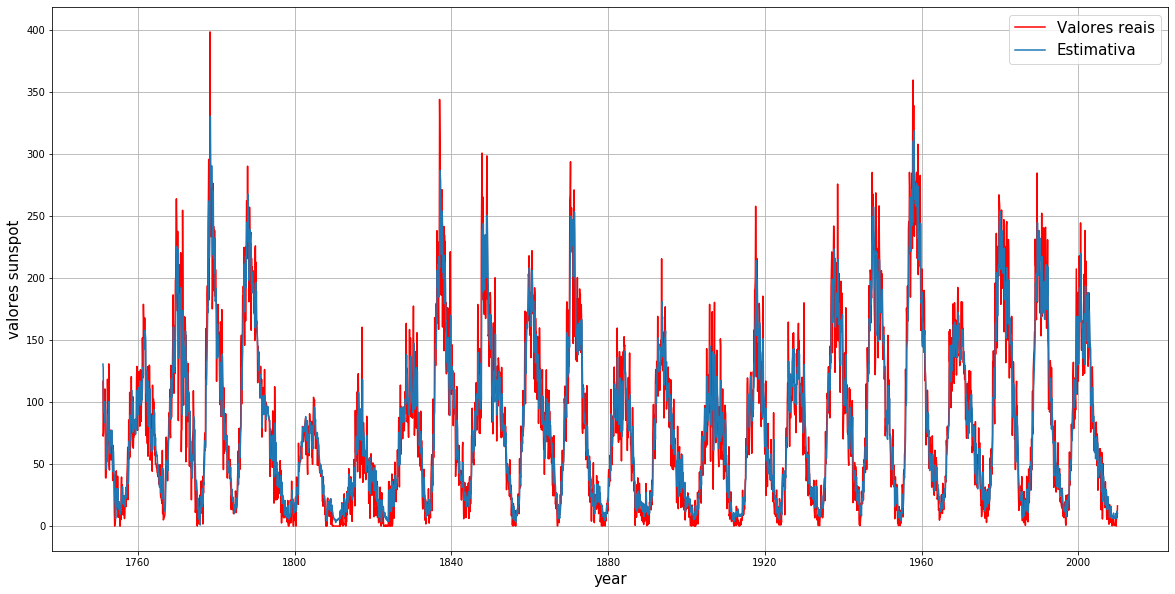

In [27]:
# Plota os valores do treinamento e suas respectivas aproximações
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(anos_treino[24:], sunspots_treino[24:], 'r', label="Valores reais")
plt.plot(anos_treino[24:], np.dot(phi,w), label="Estimativa")
plt.legend(fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('valores sunspot', fontsize=15)
plt.show()